from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import Imputer

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from numpy import array
from matplotlib import cm

import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
import pandas as pd
data_train = pd.read_csv("./datasets/ChaLearn/train_gt.csv")
data_test = pd.read_csv("./datasets/ChaLearn/test_gt.csv")
data_val = pd.read_csv("./datasets/ChaLearn/valid_gt.csv")
data = pd.concat([data_train, data_test], ignore_index=True)

In [4]:
data_test.mean

<bound method DataFrame.mean of            image       mean       stdv
0     005613.jpg  23.205128   5.459311
1     005614.jpg  70.736842   6.483518
2     005615.jpg  55.368421   5.796646
3     005616.jpg  24.277778   2.193565
4     005617.jpg  25.230769   5.618018
5     005618.jpg  35.179487   6.180498
6     005619.jpg  26.923077   4.714324
7     005620.jpg  48.189189   6.665108
8     005621.jpg  18.675676   2.156750
9     005622.jpg  57.378378   7.064764
10    005623.jpg  52.150000   5.484296
11    005624.jpg  30.289474   4.064661
12    005625.jpg  30.256410   5.207086
13    005626.jpg  26.526316   4.063553
14    005627.jpg  33.461538   5.732705
15    005628.jpg  69.459459   4.427156
16    005629.jpg  18.763158   2.878543
17    005630.jpg  33.500000   5.770843
18    005631.jpg  42.763158   7.794851
19    005632.jpg  33.055556   3.936612
20    005633.jpg  34.307692   5.369209
21    005634.jpg  23.368421   3.520026
22    005635.jpg  32.923077   5.249589
23    005636.jpg  27.394737   8.

Saving figure 4-age-chalearn-train


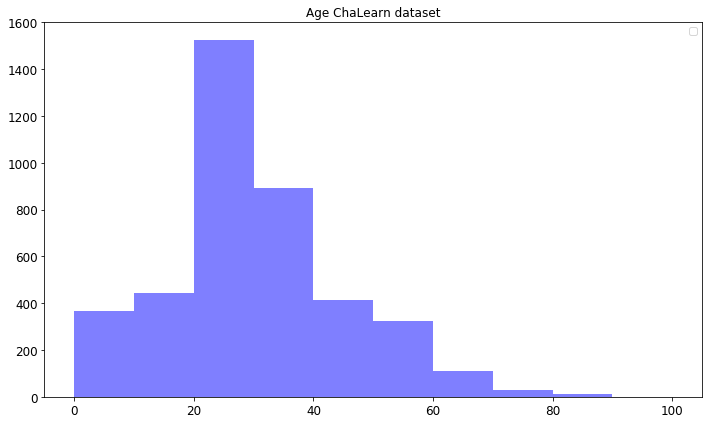

In [5]:
plt.figure(figsize=(10, 6))

plt.hist(data_train['mean'],bins=10,range=[0,100],alpha=0.5,color='b')

plt.title("Age ChaLearn dataset")
plt.legend()

save_fig("4-age-chalearn-train")

('Saving figure', '4-age-chalearn-test')


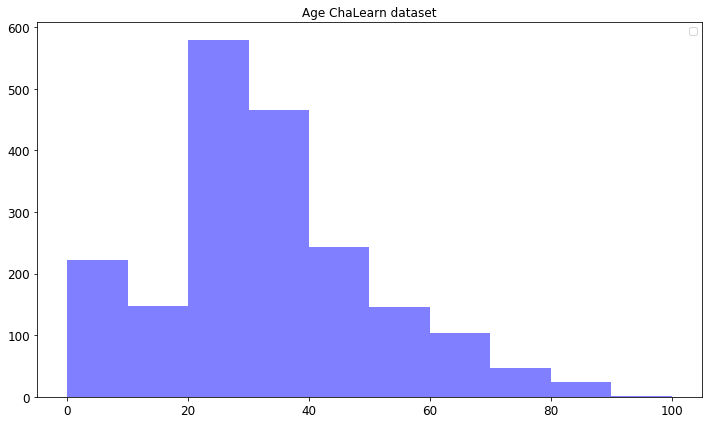

In [5]:
plt.figure(figsize=(10, 6))

plt.hist(data_test['mean'],bins=10,range=[0,100],alpha=0.5,color='b')

plt.title("Age ChaLearn dataset")
plt.legend()

save_fig("4-age-chalearn-test")

('Saving figure', '4-age-chalearn-valid')


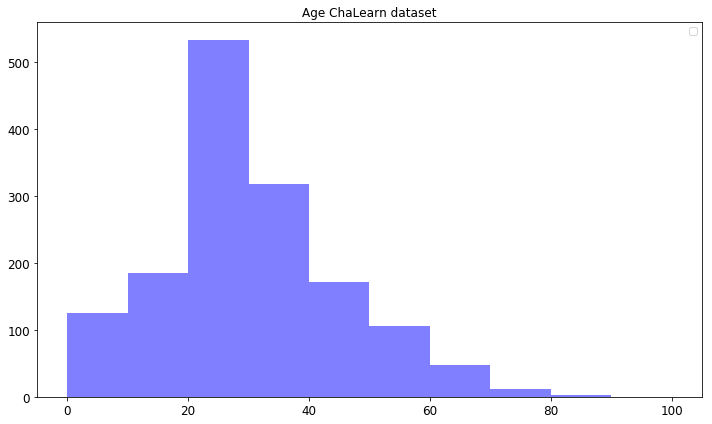

In [6]:
plt.figure(figsize=(10, 6))

plt.hist(data_val['mean'],bins=10,range=[0,100],alpha=0.5,color='b')

plt.title("Age ChaLearn dataset")
plt.legend()

save_fig("4-age-chalearn-valid")

('Saving figure', '4-age-chalearn-traintest')


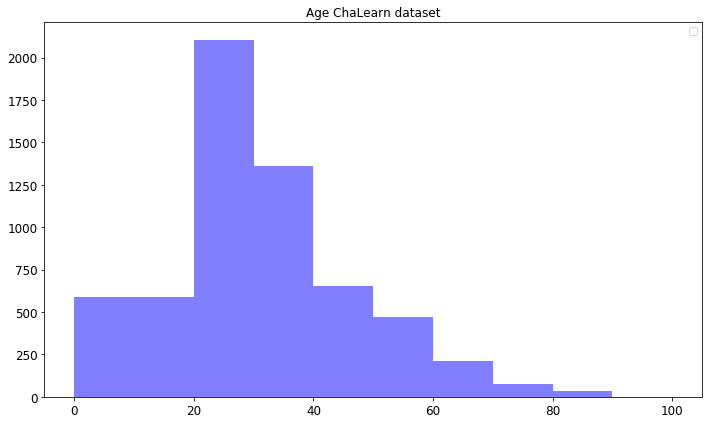

In [14]:
plt.figure(figsize=(10, 6))

plt.hist(data['mean'],bins=10,range=[0,100],alpha=0.5,color='b')

plt.title("Age ChaLearn dataset")
plt.legend()

save_fig("4-age-chalearn-traintest")

# 2. Feature engineering

In [5]:
data_train['full_path_crop'] = './datasets/ChaLearn/train/' + data_train['image'].astype(str)
data_test['full_path_crop'] = './datasets/ChaLearn/test/' + data_test['image'].astype(str)
data_val['full_path_crop'] = './datasets/ChaLearn/valid/' + data_val['image'].astype(str)

In [6]:
data_label = pd.concat([data_train, data_test], ignore_index=True)
data_label

,image,mean,stdv,full_path_crop
0,003856.jpg,35.416667,4.609019,./datasets/ChaLearn/train/003856.jpg
1,001060.jpg,35.462963,4.901674,./datasets/ChaLearn/train/001060.jpg
2,003987.jpg,20.136364,3.671703,./datasets/ChaLearn/train/003987.jpg
3,002290.jpg,68.538462,7.203440,./datasets/ChaLearn/train/002290.jpg
4,001969.jpg,28.933333,6.702902,./datasets/ChaLearn/train/001969.jpg
5,003617.jpg,24.928571,6.318502,./datasets/ChaLearn/train/003617.jpg
6,002150.jpg,18.236641,2.294474,./datasets/ChaLearn/train/002150.jpg
7,003058.jpg,52.736842,7.411528,./datasets/ChaLearn/train/003058.jpg
8,002362.jpg,39.692308,5.818423,./datasets/ChaLearn/train/002362.jpg
9,004046.jpg,27.250000,4.241167,./datasets/ChaLearn/train/004046.jpg


In [7]:
data_val["age_class"] = data_val['mean']
data_val.loc[data_val['mean'] < 20, 'age_class'] = 0
data_val.loc[(data_val['mean'] >= 20) & (data_val['mean'] < 30), 'age_class'] = 1
data_val.loc[(data_val['mean'] >= 30) & (data_val['mean'] < 40), 'age_class'] = 2
data_val.loc[(data_val['mean'] >= 40) & (data_val['mean'] < 50), 'age_class'] = 3
data_val.loc[(data_val['mean'] >= 50) & (data_val['mean'] < 60), 'age_class'] = 4
data_val.loc[(data_val['mean'] >= 60) & (data_val['mean'] < 70), 'age_class'] = 5
data_val.loc[(data_val['mean'] >= 70), 'age_class'] = 6
data_val["age_class"].value_counts()

1.0    533
2.0    318
0.0    310
3.0    172
4.0    106
5.0     47
6.0     14
Name: age_class, dtype: int64

In [8]:
data_label["age_class"] = data_label['mean']
data_label.loc[data['mean'] < 20, 'age_class'] = 0
data_label.loc[(data['mean'] >= 20) & (data_label['mean'] < 30), 'age_class'] = 1
data_label.loc[(data['mean'] >= 30) & (data_label['mean'] < 40), 'age_class'] = 2
data_label.loc[(data['mean'] >= 40) & (data_label['mean'] < 50), 'age_class'] = 3
data_label.loc[(data['mean'] >= 50) & (data_label['mean'] < 60), 'age_class'] = 4
data_label.loc[(data['mean'] >= 60) & (data_label['mean'] < 70), 'age_class'] = 5
data_label.loc[(data['mean'] >= 70), 'age_class'] = 6

data_label["age_class"].value_counts()

1.0    2103
2.0    1359
0.0    1177
3.0     656
4.0     470
5.0     214
6.0     112
Name: age_class, dtype: int64

In [9]:
data_0 = data_label[data_label['age_class']==0].sample(n=112)
data_1 = data_label[data_label['age_class']==1].sample(n=112)
data_2 = data_label[data_label['age_class']==2].sample(n=112)
data_3 = data_label[data_label['age_class']==3].sample(n=112)
data_4 = data_label[data_label['age_class']==4].sample(n=112)
data_5 = data_label[data_label['age_class']==5].sample(n=112)
data_6 = data_label[data_label['age_class']==6].sample(n=112)


In [10]:
data = pd.concat([data_0,
                  data_1,
                  data_2,
                  data_3,
                  data_4,
                  data_5,
                  data_6])

In [11]:
data.shape

(784, 5)

In [12]:
data['age_class'].mean()

3.0

In [13]:
data[data['age_class']==1]

,image,mean,stdv,full_path_crop,age_class
1873,000507.jpg,26.211765,3.467815,./datasets/ChaLearn/train/000507.jpg,1.0
995,003776.jpg,28.946429,5.061831,./datasets/ChaLearn/train/003776.jpg,1.0
479,000648.jpg,29.548387,5.302700,./datasets/ChaLearn/train/000648.jpg,1.0
1021,002670.jpg,20.076923,2.673561,./datasets/ChaLearn/train/002670.jpg,1.0
4242,005742.jpg,28.297297,4.614108,./datasets/ChaLearn/test/005742.jpg,1.0
2045,002210.jpg,24.357143,3.938947,./datasets/ChaLearn/train/002210.jpg,1.0
1169,000214.jpg,28.857143,4.808581,./datasets/ChaLearn/train/000214.jpg,1.0
2728,002887.jpg,24.250000,1.920286,./datasets/ChaLearn/train/002887.jpg,1.0
1543,001156.jpg,23.000000,3.505098,./datasets/ChaLearn/train/001156.jpg,1.0
2802,001817.jpg,29.529412,7.357410,./datasets/ChaLearn/train/001817.jpg,1.0


# 2. Inception

## 3.1 Inception classification

El modelo pre-entrenado que utilizaremos es Inception, que esta entrenado en imágenes de tamaño 299x299. Este clasificador identifica imágenes en más de 1000 clases (ver competencia ImageNet).

En un primer lugar vamos a descargar el modelo y utilizarlo en nuestras imágenes. Para esto tenemos que preprocesar nuestras fotos para que puedan ser analizadas por el modelo Inception:

Write a preprocessing step that will resize and crop the image to 299 × 299, with some randomness for data augmentation. Agreagamos una funcionalidad de formateo de las imagenes que nos servirá para aumentar el dataset de entrenamiento agregando zoom, crop y flips aleatorios antes de adaptar el tamaño de la imagen a 299x299.

First, let's implement this using NumPy and SciPy:

   - using basic NumPy slicing for image cropping,
   - NumPy's fliplr() function to flip the image horizontally (with 50% probability),
   - and SciPy's imresize() function for zooming.
       - Note that imresize() is based on the Python Image Library (PIL).

For more image manipulation functions, such as rotations, check out SciPy's documentation or this nice page.

In [13]:
from scipy.misc import imresize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2, training = True):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    if(training):
        # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
        # between 1.0 and 1.0 + `max_zoom`.
        resize_factor = np.random.rand() * max_zoom + 1.0
        crop_width = int(crop_width / resize_factor)
        crop_height = int(crop_height / resize_factor)
    
        # Next, we can select a random location on the image for this bounding box.
        x0 = np.random.randint(0, width - crop_width)
        y0 = np.random.randint(0, height - crop_height)
        x1 = x0 + crop_width
        y1 = y0 + crop_height
    
        # Let's crop the image using the random bounding box we built.
        image = image[y0:y1, x0:x1]

        # Let's also flip the image horizontally with 50% probability:
        if np.random.rand() < 0.5:
            image = np.fliplr(image)

    # Now, let's resize the image to the target dimensions.
    image = imresize(image, (target_width, target_height))
    
    # Finally, let's ensure that the colors are represented as
    # 32-bit floats ranging from 0.0 to 1.0 (for now):
    return image.astype(np.float32) / 255

In [14]:
width = 299
height = 299
channels = 3

./datasets/ChaLearn/train/000507.jpg


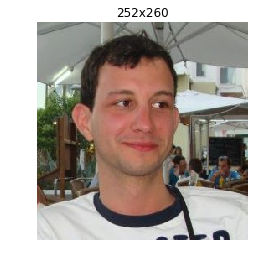

In [15]:
import matplotlib.image as mpimg
filename = data['full_path_crop'][1873]
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



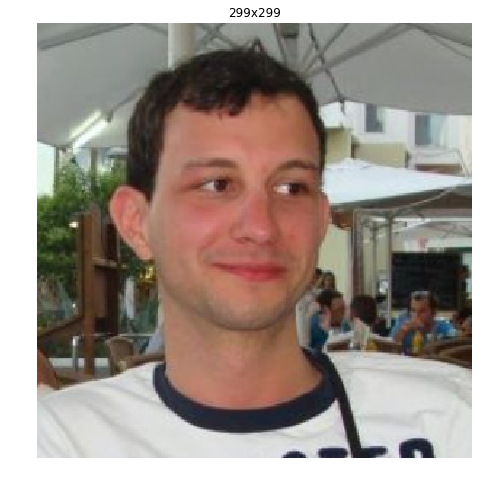

In [16]:
prepared_image = prepare_image(test_image, training = False)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [17]:
prepared_image = 2 * prepared_image - 1

In [18]:
prepared_image.shape

(299, 299, 3)

Download the latest pretrained Inception v3 model: the checkpoint is available at https://github.com/tensorflow/models/tree/master/research/slim. The list of class names is available at https://goo.gl/brXRtZ, but you must insert a "background" class at the beginning.

In [19]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [20]:
fetch_pretrained_inception_v3()

In [21]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

## 3.2. Transfer learning 

Creamos el nuevo target:

In [22]:
age_classes = ['0-20','20-30','30-40','40-50','50-60','60-70','70-']
age_classes

[u'0-20', u'20-30', u'30-40', u'40-50', u'50-60', u'60-70', u'70-']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



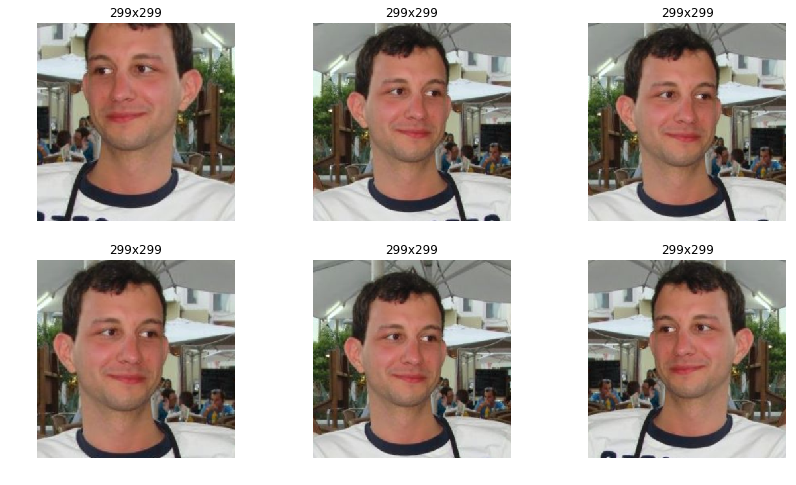

In [23]:
rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(test_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [24]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

In [25]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [26]:
end_points["PreLogits"]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [27]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

In [28]:
n_outputs = len(age_classes)

with tf.name_scope("new_output_layer"):
    age_logits = tf.layers.dense(prelogits, n_outputs, name="age_logits")
    Y_proba = tf.nn.softmax(age_logits, name="Y_proba")

In [29]:
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=age_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    age_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="age_logits")
    training_op = optimizer.minimize(loss, var_list=age_vars)
    
    loss_train_summary = tf.summary.scalar('loss_train', loss)
    loss_test_summary = tf.summary.scalar('loss_test', loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(age_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    accuracy_train_summary = tf.summary.scalar('accuracy_train', accuracy)
    accuracy_test_summary = tf.summary.scalar('accuracy_test', accuracy)

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [30]:
[v.name for v in age_vars]

[u'age_logits/kernel:0', u'age_logits/bias:0']

In [31]:
age_class_ids = {age_class: index for index, age_class in enumerate(age_classes)}
age_class_ids

{u'0-20': 0,
 u'20-30': 1,
 u'30-40': 2,
 u'40-50': 3,
 u'50-60': 4,
 u'60-70': 5,
 u'70-': 6}

In [91]:
from collections import defaultdict

image_paths = defaultdict(list)
image_paths_val = defaultdict(list)

for age_class in age_class_ids:
    print(age_class,age_class_ids[age_class])
    for i,p in enumerate(data[data['age_class']==age_class_ids[age_class]]['full_path_crop']):
    #for i,p in enumerate(data_label[data_label['age_class']==age_class_ids[age_class]]['full_path_crop']):
        image_paths[age_class].append(p)

for age_class in age_class_ids:
    print(age_class,age_class_ids[age_class])
    for i,p in enumerate(data_val[data_val['age_class']==age_class_ids[age_class]]['full_path_crop']):
        image_paths_val[age_class].append(p)

60-70 5
50-60 4
70- 6
20-30 1
30-40 2
0-20 0
40-50 3
60-70 5
50-60 4
70- 6
20-30 1
30-40 2
0-20 0
40-50 3


In [92]:
age_paths_and_classes = []
for age_class, paths in image_paths.items():
    for path in paths:
        age_paths_and_classes.append((path, age_class_ids[age_class]))
        
age_paths_and_classes_test = []
for age_class, paths in image_paths_val.items():
    for path in paths:
        age_paths_and_classes_test.append((path, age_class_ids[age_class]))

In [93]:
len(age_paths_and_classes)

784

In [94]:
test_ratio = 0.2
train_size = int(len(age_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(age_paths_and_classes)

age_paths_and_classes_train = age_paths_and_classes[:train_size]
age_paths_and_classes_test = age_paths_and_classes[train_size:]

In [95]:
print(len(age_paths_and_classes_train),len(age_paths_and_classes_test))

627 157


In [96]:
age_paths_and_classes_train[:3]

[(u'./datasets/ChaLearn/train/001269.jpg', 4),
 (u'./datasets/ChaLearn/test/007416.jpg', 6),
 (u'./datasets/ChaLearn/train/001422.jpg', 1)]

In [97]:
from random import sample

def prepare_batch(age_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(age_paths_and_classes, batch_size)
    images = []
    y =[]
    for path, labels in batch_paths_and_classes:
        if(len(mpimg.imread(path).shape)>2):
            images.append(mpimg.imread(path)[:, :, :channels])
            y.append(labels)
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array(y, dtype=np.int32)
    return X_batch, y_batch

def prepare_batch_paths(age_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(age_paths_and_classes, batch_size)
    images = []
    y =[]
    paths_batch = []
    for path, labels in batch_paths_and_classes:
        if(len(mpimg.imread(path).shape)>2):
            images.append(mpimg.imread(path)[:, :, :channels])
            y.append(labels)
            paths_batch.append(path)
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array(y, dtype=np.int32)
    return X_batch, y_batch, paths_batch

In [39]:
X_batch, y_batch, paths_batch = prepare_batch_paths(age_paths_and_classes, batch_size=6)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [40]:
X_batch.shape

(6, 299, 299, 3)

In [54]:
#X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes_test, batch_size=len(age_paths_and_classes_test))
X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes_test, batch_size=200)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [55]:
X_test.shape

(198, 299, 299, 3)

In [98]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)
logdir = log_dir("ages_chalearn")

In [125]:
## Not used
n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(age_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(age_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_ages_model_ChaLearn")

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
Epoch 0.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



.

KeyboardInterrupt: 

In [1]:
n_epochs = 5
batch_size = 10
n_batches = len(age_paths_and_classes_train) // batch_size

checkpoint_path = logdir+"/models/my_ages_model_ChaLearn.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = logdir+"/models/my_ages_model_ChaLearn"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 20

# create log writer object
writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())

with tf.Session() as sess:
    
    writer.add_graph(sess.graph)
    
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_batches):
            print(".", end="")
            X_batch, y_batch = prepare_batch(age_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

            #if iteration % 10 == 0:
            if iteration % 5 == 0:
                feed = {X: X_batch, y: y_batch}
                result = sess.run([accuracy_train_summary, loss_train_summary], feed_dict=feed)
                
                acc_train_sum = result[0]
                loss_train_sum = result[1]
                
                acc_test_sum = sess.run(accuracy_test_summary,feed_dict={X: X_test, y: y_test})
                loss_test_sum = sess.run(loss_test_summary,feed_dict={X: X_test, y: y_test})
                
                writer.add_summary(acc_train_sum, epoch * n_batches + iteration)
                writer.add_summary(acc_test_sum, epoch * n_batches + iteration)
                writer.add_summary(loss_train_sum, epoch * n_batches + iteration)
                writer.add_summary(loss_test_sum, epoch * n_batches + iteration)
                
        #acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        #print("  Train accuracy:", acc_train)
        
        #Checkpoint save to resume training and implement early stopping
        if epoch % 1 == 0:
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_test_sum < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_test_sum
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break
                    
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        loss_train = loss.eval(feed_dict={X: X_batch, y: y_batch})
        loss_test = loss.eval(feed_dict={X: X_test, y: y_test})
        
        print(epoch, "Train: accuracy ", acc_train," Loss ",loss_train, "Test: accuracy ", acc_test,  "Loss ",loss_test)

        #save_path = saver.save(sess, "./my_ages_model_ChaLearn")
        saver.save(sess, final_model_path)

SyntaxError: invalid syntax (<ipython-input-1-feca3ae49ce8>, line 32)

In [77]:
n_test_batches = 20
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)
paths_test_batches = np.array_split(paths_test, n_test_batches)

In [78]:
with tf.Session() as sess:
    saver.restore(sess, "./my_ages_model_ChaLearn")

    print("Computing final accuracy on the test set (this will take a while)...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

INFO:tensorflow:Restoring parameters from ./my_ages_model_ChaLearn
Computing final accuracy on the test set (this will take a while)...
Test accuracy: 0.28000003


## 3.3 Test on custom images

## 3.4 Images predicted incorrectly

## 3.5 Confusion Matrix

In [3]:
X_test_1 = np.load('X_test.npy')
y_test_1 = np.load('y_test.npy')

NameError: name 'np' is not defined

In [71]:
y_test_1

array([6, 3, 1, 4, 0, 3, 2, 1, 0, 2, 5, 1, 1, 0, 6, 0, 3, 0, 1, 0, 6, 1,
       3, 4, 4, 2, 4, 6, 3, 6, 2, 2, 6, 0, 5, 6, 5, 0, 2, 4, 1, 1, 2, 4,
       4, 1, 1, 2, 2, 4, 3, 4, 6, 6, 4, 5, 2, 1, 1, 2, 5, 3, 1, 5, 6, 3,
       1, 5, 4, 0, 1, 4, 5, 5, 1, 2, 5, 3, 2, 0, 4, 1, 2, 5, 3, 4, 2, 6,
       2, 2, 4, 6, 3, 6, 2, 4, 1, 2, 3, 6, 1, 1, 1, 3, 2, 6, 2, 6, 2, 6,
       4, 3, 4, 3, 3, 6, 5, 4, 0, 1, 1, 3, 1, 2, 0, 3, 0, 0, 5, 5, 4, 5,
       3, 2, 4, 4, 1, 6, 6, 6, 5, 3, 5, 5, 2, 0, 4, 0, 2, 0, 6, 6, 5, 2,
       4, 3, 1, 2, 2, 0, 2, 0, 6, 6, 2, 4, 4, 5, 1, 0, 4, 0, 6, 0, 6, 0,
       0, 5, 4, 4, 4, 4, 4, 6, 3, 0, 1, 2, 0, 5, 0, 5, 5, 2, 6, 2, 0, 0,
       3, 5, 2, 3, 2, 2, 3, 1, 6, 6, 4, 4, 5, 0, 4, 0, 5, 4, 0, 4, 3, 4,
       6, 3, 6, 0, 3, 5, 0, 3, 1, 1, 0, 3, 1, 6, 4, 6, 0, 2, 0, 3, 5, 1,
       4, 2, 4, 0, 1, 1, 1, 4, 5, 2, 1, 2, 5, 3, 4, 1, 4, 1, 6, 1, 0, 3,
       1, 2, 3, 5, 1, 6, 1, 1, 4, 1, 2, 0, 6, 5, 5, 3, 6, 4, 4, 6, 2, 6,
       2, 2, 2, 6, 1, 2, 0, 2, 2, 5, 0, 2, 1, 3, 1,

In [80]:
n_test_batches = 20
X_test_batches = np.array_split(X_test_1, n_test_batches)
y_test_batches = np.array_split(y_test_1, n_test_batches)

In [100]:
predictions_test = []
with tf.Session() as sess:
    #saver.restore(sess, "./my_ages_model_ChaLearn")
    saver.restore(sess, final_model_path)
    for batch in range(len(X_test_batches)):
        for X_test_i in X_test_batches[batch]:
            prepared_image = prepare_image(X_test_i, training = False)
            prepared_image = 2 * prepared_image - 1
            prepared_image = prepared_image.reshape(-1, height, width, channels)
            predictions_test.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

INFO:tensorflow:Restoring parameters from logs/ages_chalearn-run-20180430113157//models/my_ages_model_ChaLearn


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [101]:
predict = [np.argmax(predictions_test[i]) for i in range(len(predictions_test))]

In [102]:
true = [item for sublist in y_test_batches for item in sublist]

In [103]:
print(len(predict),len(true))

907 907


In [104]:
age_true = np.asarray(true)
age_predict = np.asarray(predict)
np.savetxt("age_ChaLearn_true.csv", age_true, delimiter=",")
np.savetxt("age_ChaLearn_predict.csv", age_predict, delimiter=",")

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
from sklearn.metrics import confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(true, predict)
np.set_printoptions(precision=2)

In [2]:
from sklearn.metrics import accuracy_score
accuracy_score(true, predict)

NameError: name 'true' is not defined

Confusion matrix, without normalization
[[18 29 33  2  3  8 23]
 [17 23 51  4  8 16 19]
 [15 23 43  7 24 12 17]
 [ 3 22 22  9 30 12 25]
 [ 1  7 19  8 40 29 34]
 [ 0  4 17  5 41 19 28]
 [ 3  7  6  4 55 21 41]]
Saving figure 2-age-cha-confusion-matrix


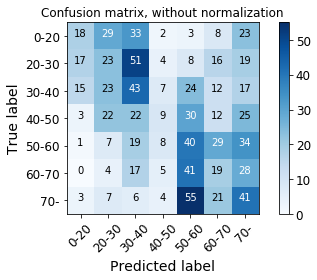

In [108]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=age_classes,
                      title='Confusion matrix, without normalization')
save_fig("2-age-cha-confusion-matrix")
plt.show()

Normalized confusion matrix
[[0.16 0.25 0.28 0.02 0.03 0.07 0.2 ]
 [0.12 0.17 0.37 0.03 0.06 0.12 0.14]
 [0.11 0.16 0.3  0.05 0.17 0.09 0.12]
 [0.02 0.18 0.18 0.07 0.24 0.1  0.2 ]
 [0.01 0.05 0.14 0.06 0.29 0.21 0.25]
 [0.   0.04 0.15 0.04 0.36 0.17 0.25]
 [0.02 0.05 0.04 0.03 0.4  0.15 0.3 ]]
Saving figure 2-age-cha-confusion-matrix-norm


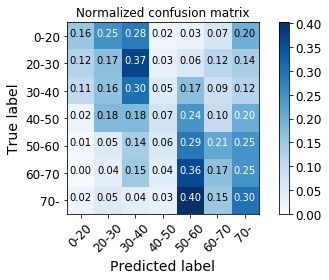

In [109]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=age_classes, normalize=True,
                      title='Normalized confusion matrix')
save_fig("2-age-cha-confusion-matrix-norm")
plt.show()